#Imports and Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
import sklearn.decomposition

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data();
"""
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
"""

label_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal',
             'Shirt','Sneaker','Bag','Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train = np.zeros([60000,784]) 
for i in range(60000): 
    img=train_images[i,:,:]
    X_train[i,:] = img.reshape([784])

X_test = np.zeros([10000,784]) 
for i in range(10000):
    img=test_images[i,:,:]
    X_test[i,:] = img.reshape([784])

X_sub = X_train[:1000,:]
sub_labels = train_labels[:1000]



#1 a

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

#Finding k
#X_tilda = U S V'
k=250 #random large k
svd = sklearn.decomposition.TruncatedSVD(n_components = k,random_state = 27)
svd.fit(X_tilda)
evr = svd.explained_variance_ratio_
cum_sum = [0]
for i in evr: cum_sum.append(cum_sum[-1]+i) 
cum_sum = cum_sum[1:] #removes the 0 put there earlier

plt.plot(range(len(cum_sum)), cum_sum)
plt.xlabel('k')
plt.ylabel('Percent Variance')
#cum_sum[186],cum_sum[187] bounds .95
#choose k=187 

In [ ]:
k=187
PCA = sklearn.decomposition.PCA(n_components = k)
PCA.fit(X_tilda)
Y_train = PCA.transform(X_tilda)
Y_test = PCA.transform(X_test_centered)

Y_test.shape


In [ ]:
acc=[]

for k in range(1,13):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(Y_train, train_labels)
    y_preds = model.predict(Y_test)
    score=accuracy_score(y_true=test_labels, y_pred=y_preds)
    acc.append(score)
    print('K is',k,'\n acc is:', score)

In [ ]:
#KNN Accuracy with PCA(95%)
acc=[0.852,0.8517,0.8601,0.8648,0.8618,0.8625,
     0.8626,0.8616,0.8609,0.8623,0.8595,0.8586]

#plots
plt.plot(range(1,13), 1 - np.array(acc), '-bs', label='PCA(95%) + KNN')
plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

#b

In [ ]:
col_means = np.mean(X_train, axis = 0)
X_tilda = X_train - col_means
X_test_centered = X_test - col_means

trial_bs=[180]
acc_mat =np.zeros([len(trial_bs),12]) 
for a in range(len(trial_bs)):
    b=trial_bs[a]
    PCA = sklearn.decomposition.PCA(n_components = b)
    PCA.fit(X_tilda)
    Y_train = PCA.transform(X_tilda)
    Y_test = PCA.transform(X_test_centered)

    for k in range(1,13):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(Y_train, train_labels)
        y_preds = model.predict(Y_test)
        score=accuracy_score(y_true=test_labels, y_pred=y_preds)
        print('b is:',b,'K is:',k,'\n acc is:', score)
        acc_mat[a,k-1] = score

print(acc_mat)

In [ ]:
b_50 = [0.8423, 0.8418, 0.8517, 0.8573, 0.8563, 0.8586,
        0.8589, 0.8587, 0.8556, 0.8576, 0.8577, 0.8564]
b_75 = [0.8406, 0.8422, 0.8518, 0.8566, 0.8568, 0.8586,
        0.8591, 0.8581, 0.8571, 0.8571, 0.8563, 0.8559]
b_100= [0.8499, 0.8491, 0.86, 0.8626, 0.8624, 0.8629,
        0.8597, 0.8614, 0.8598, 0.8607, 0.8589, 0.8594]
b_125= [0.8502, 0.85  , 0.8592, 0.8628, 0.8626, 0.8621,
        0.8605, 0.8625, 0.8603, 0.861 , 0.8609, 0.8592]
b_150= [0.8528, 0.8518, 0.8586, 0.8631, 0.8633, 0.8634,
        0.8634, 0.8641, 0.8614, 0.8633, 0.8591, 0.8607]
b_160= [0.8535, 0.8522, 0.861,  0.8641, 0.8631, 0.8639,
        0.8622, 0.8627, 0.8608, 0.8629, 0.8599, 0.8607]
b_170= [0.8515, 0.853 , 0.8594, 0.8622, 0.8629, 0.8636,
        0.8614, 0.8623, 0.8602, 0.8612, 0.8586, 0.8598]
b_180= [0.8519, 0.852 , 0.8588, 0.8633, 0.8627, 0.8634,
        0.8628, 0.8628, 0.8611, 0.8621, 0.8602, 0.8588]
b_200= [0.8524, 0.8524, 0.8595, 0.8633, 0.8649, 0.8632,
        0.8602, 0.863 , 0.8615, 0.8634, 0.8597, 0.8605]
acc=    [0.852, 0.8517, 0.8601, 0.8648, 0.8618, 0.8625,
         0.8626,0.8616, 0.8609, 0.8623, 0.8595, 0.8586]

Text(0, 0.5, 'Percent Error')

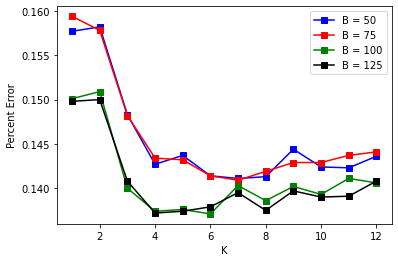

In [ ]:
b_50_error = 1-np.array(b_50)
b_75_error = 1-np.array(b_75)
b_100_error = 1-np.array(b_100)
b_125_error = 1-np.array(b_125)



#plots
plt.plot(range(1,13), b_50_error, '-bs', label='B = 50')
plt.plot(range(1,13), b_75_error,'-rs', label = 'B = 75')
plt.plot(range(1,13), b_100_error,'-gs', label = 'B = 100')
plt.plot(range(1,13), b_125_error, '-ks', label='B = 125')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

Text(0, 0.5, 'Percent Error')

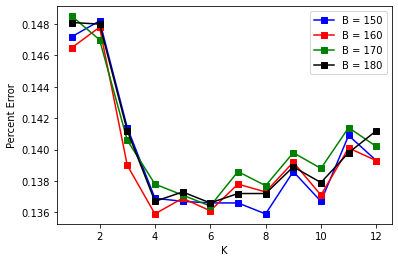

In [ ]:
b_150_error = 1-np.array(b_150)
b_160_error = 1-np.array(b_160)
b_170_error = 1-np.array(b_170)
b_180_error = 1-np.array(b_180)

#plots
plt.plot(range(1,13), b_150_error, '-bs', label='B = 150')
plt.plot(range(1,13), b_160_error,'-rs', label = 'B = 160')
plt.plot(range(1,13), b_170_error,'-gs', label = 'B = 170')
plt.plot(range(1,13), b_180_error, '-ks', label='B = 180')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

Text(0, 0.5, 'Percent Error')

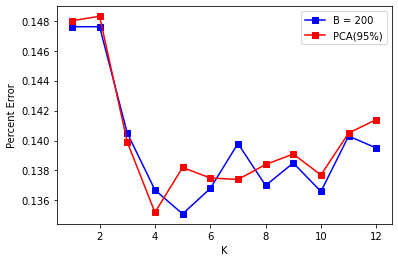

In [ ]:
b_200_error = 1-np.array(b_200)
error = 1-np.array(acc)

#plots
plt.plot(range(1,13), b_200_error, '-bs', label='B = 200')
plt.plot(range(1,13), error,'-rs', label = 'PCA(95%)')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')

Text(0, 0.5, 'Percent Error')

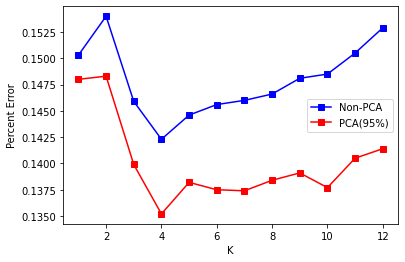

In [ ]:
non_pca_acc=[0.8497,0.846,0.8541,0.8577,0.8554,0.8544,
          0.854,0.8534,0.8519,0.8515,0.8495,0.8471]

non_pca_error = 1-np.array(non_pca_acc)

plt.plot(range(1,13), non_pca_error, '-bs', label='Non-PCA')
plt.plot(range(1,13), error,'-rs', label = 'PCA(95%)')

plt.legend()
plt.xlabel('K')
plt.ylabel('Percent Error')